# BIL 366 Data Mining: Homework-2
### Bilinmesi gerekenler
distance measures, preprocessing (aggregation, cleaning, sampling),
pandas,numpy, matplotlib.pyplot
### Öğrenme Hedefleri 
Pandas kullanılarak distance measureler kullanılarak data benzerliğinin ölçülmesi ve outlier detection, sampling ile sample size'ın küçültülmesi ve ne kadar sample size'ın datayı ne kadar temsil ettiğinin gözlemlenmesi.


### Giriş
Covid süresince Türkiye location datasından Google'in elde etmiş olduğu mobility datası https://www.google.com/covid19/mobility/ sitesi üzerinden yayınlanmıştır.
Bu ödevde sizden bu datayla ilgili önanaliz yapıp raporlamanız istenmektedir. Datayı indirme ve yüklemede bir bütünlük olması açısından bu datayı drive üzerinden erişime açtım, aşağıdaki şekilde erişebilirsiniz.



In [15]:
import pandas as pd
from scipy.spatial import distance

#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df20 = pd.read_csv(url2020)
df20.info()

df21 = pd.read_csv(url2021)
df21.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                                                167657 non-n

### Yapılacaklar
1. Yukarıdaki data framede içerisinde data olmayan (tüm sütun null), sütunları çıkarınız. 
2. Mahalanobis distance distributiondan uzaklığı ölçtüğü için outlier belirlenmesinde kullanılabilir.2020 ve 2021 her iki datayıda aylara göre gruplandırdıktan(mean kullanabilirsiniz) sonra (aggregation) her bir satır ile data (tüm sütun) arasındaki Mahalanobis distance'ı hesaplayarak yeni bir sütun olarak ekleyiniz ve buradaki en büyük elemanın outlier olduğunu 2020 ve 2021 yılları için ayrı ayrı gösteriniz. 


In [16]:
             ############### 1.soru ###################
data20 = pd.DataFrame()
from pandas.api.types import is_numeric_dtype
for col in df20.columns:
    if is_numeric_dtype(df20[col]):
        if df20[col].count() != 0:
          data20[col] = df20[col]
data20 = data20.dropna()

data21 = pd.DataFrame()
from pandas.api.types import is_numeric_dtype
for col in df21.columns:
    if is_numeric_dtype(df21[col]):
        if df21[col].count() != 0:
          data21[col] = df21[col]
data21 = data21.dropna()


In [17]:
data20.head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2.0,3.0,-11.0,-4.0,7.0,1.0
1,7.0,6.0,14.0,2.0,5.0,0.0
2,6.0,5.0,10.0,5.0,8.0,-2.0
3,4.0,6.0,11.0,4.0,8.0,-2.0
4,0.0,3.0,6.0,0.0,9.0,-2.0


In [18]:
data21.head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
2,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
3,-33.0,18.0,4.0,-17.0,-20.0,7.0
4,-38.0,12.0,-8.0,-21.0,-22.0,10.0


In [ ]:
#Distance ölçümü için 
#covariance matrisini numpy.cov() fonksiyonu, 
#inverse (tersini) numpy.linalg.inv() fonksiyonu 
#ve aşağıdaki scipy fonksiyonunu kullanabilirsiniz: 
#https://docs.scipy.org/doc/scipy/reference/spatial.distance.html 
import numpy as np #np.cov(), np.linalg.inv()
from scipy.spatial import distance


In [19]:
                ######### 2.soru 2020 için ########
                ## outlier = 8.602830 nisan ayında
import pandas as pd
import numpy as np
import scipy as sp

df20.index = pd.to_datetime(df20['date'],format='%Y-%m-%d')
result=df20.groupby(df20.index.month).mean()
data20 = pd.DataFrame()
from pandas.api.types import is_numeric_dtype
for col in result.columns:
    if result[col].count() != 0:
      if is_numeric_dtype(result[col]):
        data20[col] = result[col]
data20 = data20.dropna()

def mahalanobis(x=None, data=None, cov=None):
  
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = data20.head(500)
df_x['mahala'] = mahalanobis(x=data20, data=df_x)
df_x.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mahala
date,,,,,,,
2,2.028130,3.238759,4.509374,-6.643751,9.353484,-0.698443,6.799677
3,-21.700010,-4.395083,-6.153226,-22.896115,-12.652553,6.332819,2.515010
4,-63.148836,-26.497847,-42.117354,-64.418867,-47.539997,20.742720,8.602830
5,-55.673896,-15.239506,-28.837900,-58.020520,-41.539711,17.455508,8.229767
6,-18.156210,12.410230,32.502002,-17.117761,-10.425022,4.339668,7.663963


In [20]:
                ######### 2.soru 2021 için ########
                ## outlier = 6.946990 nisan ayında
df21.index = pd.to_datetime(df21['date'],format='%Y-%m-%d')
result=df21.groupby(df21.index.month).mean()
data21 = pd.DataFrame()
from pandas.api.types import is_numeric_dtype
for col in result.columns:
    if result[col].count() != 0:
      if is_numeric_dtype(result[col]):
        data21[col] = result[col]
data21 = data21.dropna()

def mahalanobis(x=None, data=None, cov=None):
    
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = data21.head(500)
df_x['mahala'] = mahalanobis(x=data21, data=df_x)
df_x.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mahala
date,,,,,,,
1,-50.178609,-4.892954,-34.120820,-40.967841,-31.960336,13.586489,6.529720
2,-41.179696,10.830794,-22.787913,-31.025378,-25.911408,9.778199,5.917862
3,-24.850222,24.720614,-8.019031,-20.468370,-13.891509,6.377278,2.885326
4,-35.502006,21.478576,-13.863790,-27.611852,-23.792819,11.048254,6.946990
5,-41.302671,13.629981,-11.967062,-31.783479,-33.632010,12.395152,6.527793



3. 2020 ve 2021 datalarını aylara göre grupladıktan sonra (mean değerleri ile) en az iki adet fark/benzerlik ölçümü (**slaylatlardaki similarity measures**) kullanarak 2020 ve 2021 datalarının 9-14 sütun verilerinin **aynı aylarda** birbirlerine ne oranda benzediğini bulunuz.
4. 2020 datasından (50-1000) aralığında farklı büyüklüklerde samplelar oluşturarak aylık mean değerlerin ortalama ne kadar değiştiğini grafikle gösteriniz (x sample size, y ortalama değişim): **Açıklama**▶
Tüm datanın aylık ortalama değerleri ile sample datanın aylık ortalama değerleri arasındaki farkların mutlak değerlerini toplayarak ortalamasını almanız gerekiyor. Bu şekilde her bir sample için bir hata datası elde etmiş oluyorsunuz. Sonra bunları x axisde sample size, y axisde hata olacak şekilde grafiklemeniz istenmektedir.
5. 2020 datasından her aydan (50-1000) aralığında olacak şekilde samplelar oluşturarak aylık mean değerlerin ortalama ne kadar değiştiğini grafikle gösteriniz (x sample size, y ortalama değişim): **Açıklama**▶ Bu soruda her bir aydan eşit miktarda sampller alarak sample oluşturmanız (mesela 50 için her bir aydan 50şer satır alarak, aysayısı x 50 büyüklüğünde bir sample elde etmiş oluyorsunuz) ve 4.sorudaki gibi ortalama hatayı bularak yine sample size'a göre grafiklemeniz istenmektedir. 

In [21]:
import pandas as pd
import numpy as np

df20.index = pd.to_datetime(df20['date'],format='%Y-%m-%d')
result20=df20.groupby(df20.index.month).mean()

df21.index = pd.to_datetime(df21['date'],format='%Y-%m-%d')
result21=df21.groupby(df21.index.month).mean()

data20 = pd.DataFrame()
from pandas.api.types import is_numeric_dtype
for col in result20.columns:
      if is_numeric_dtype(result20[col]):
        if result20[col].count() != 0:
            data20[col] = result20[col]
data20 = data20.dropna()

data21 = pd.DataFrame()
from pandas.api.types import is_numeric_dtype
for col in result21.columns:
      if is_numeric_dtype(result21[col]):
        if result21[col].count() != 0:
            data21[col] = result21[col]
data21 = data21.dropna()

  
#Euclidean distance
dist9 = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(data20['residential_percent_change_from_baseline'], data21['residential_percent_change_from_baseline'])]))
dist10 = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(data20[ 'grocery_and_pharmacy_percent_change_from_baseline'], data21[ 'grocery_and_pharmacy_percent_change_from_baseline'])]))
dist11 = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(data20['parks_percent_change_from_baseline'], data21['parks_percent_change_from_baseline'])]))
dist12 = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(data20['retail_and_recreation_percent_change_from_baseline'], data21['retail_and_recreation_percent_change_from_baseline'])]))
dist13 = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(data20['transit_stations_percent_change_from_baseline'], data21['transit_stations_percent_change_from_baseline'])]))
dist14 = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(data20['workplaces_percent_change_from_baseline'], data21['workplaces_percent_change_from_baseline'])]))

print("Euclidean distance between two series is:", dist9)
print("Euclidean distance between two series is:", dist10)
print("Euclidean distance between two series is:", dist11)
print("Euclidean distance between two series is:", dist12)
print("Euclidean distance between two series is:", dist13)
print("Euclidean distance between two series is:", dist14)

print("******************************************************")

#Manhattan distance
dist9 = np.sum(abs(a-b) for a, b in zip(data20['residential_percent_change_from_baseline'], data21['residential_percent_change_from_baseline']))
dist10 = np.sum(abs(a-b) for a, b in zip(data20[ 'grocery_and_pharmacy_percent_change_from_baseline'], data21[ 'grocery_and_pharmacy_percent_change_from_baseline']))
dist11 = np.sum(abs(a-b) for a, b in zip(data20['parks_percent_change_from_baseline'], data21['parks_percent_change_from_baseline']))
dist12 = np.sum(abs(a-b) for a, b in zip(data20['retail_and_recreation_percent_change_from_baseline'], data21['retail_and_recreation_percent_change_from_baseline']))
dist13 = np.sum(abs(a-b) for a, b in zip(data20['transit_stations_percent_change_from_baseline'], data21['transit_stations_percent_change_from_baseline']))
dist14 = np.sum(abs(a-b) for a, b in zip(data20['workplaces_percent_change_from_baseline'], data21['workplaces_percent_change_from_baseline']))

print("Manhattan distance between two series is:", dist9)
print("Manhattan distance between two series is:", dist10)
print("Manhattan distance between two series is:", dist11)
print("Manhattan distance between two series is:", dist12)
print("Manhattan distance between two series is:", dist13)
print("Manhattan distance between two series is:", dist14)



Euclidean distance between two series is: 25.89139712326378
Euclidean distance between two series is: 122.33396511260209
Euclidean distance between two series is: 98.25225759330797
Euclidean distance between two series is: 111.45448345611396
Euclidean distance between two series is: 108.14079597866156
Euclidean distance between two series is: 64.91036330424903
******************************************************
Manhattan distance between two series is: 68.44310442385809
Manhattan distance between two series is: 340.91900033383564
Manhattan distance between two series is: 291.07360320781424
Manhattan distance between two series is: 326.01423105117965
Manhattan distance between two series is: 311.2593149741907
Manhattan distance between two series is: 157.64761158035571


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7

[10.050382104187687, 8.05537265126023, 4.813737597021613, 4.0339465545498046, 2.3895343413224843]


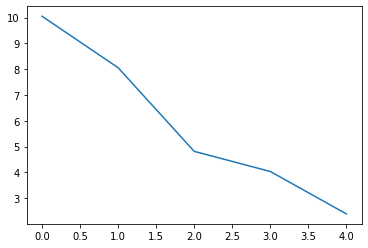

In [22]:
                       ############ 4.soru ############
df20.index = pd.to_datetime(df20['date'],format='%Y-%m-%d')
result=df20.groupby(df20.index.month).mean()
data20 = pd.DataFrame()
from pandas.api.types import is_numeric_dtype
for col in result.columns:
    if result[col].count() != 0:
      if is_numeric_dtype(result[col]):
        data20[col] = result[col]
data20 = data20.dropna()

sample = df20.sample(n=50, replace=True)
sample.index = pd.to_datetime(sample['date'],format='%Y-%m-%d')
result1=sample.groupby(sample.index.month).mean()
df1 = pd.DataFrame()
df1=abs(data20-result1)
df1.mean().mean()

sample = df20.sample(n=100, replace=True)
sample.index = pd.to_datetime(sample['date'],format='%Y-%m-%d')
result2=sample.groupby(sample.index.month).mean()
df2 = pd.DataFrame()
df2=abs(data20-result2)
df2.mean().mean()

sample = df20.sample(n=250, replace=True)
sample.index = pd.to_datetime(sample['date'],format='%Y-%m-%d')
result3=sample.groupby(sample.index.month).mean()
df3 = pd.DataFrame()
df3=abs(data20-result3)
df3.mean().mean()

sample = df20.sample(n=500, replace=True)
sample.index = pd.to_datetime(sample['date'],format='%Y-%m-%d')
result4=sample.groupby(sample.index.month).mean()
df4 = pd.DataFrame()
df4=abs(data20-result4)
df4.mean().mean()

sample = df20.sample(n=1000, replace=True)
sample.index = pd.to_datetime(sample['date'],format='%Y-%m-%d')
result5=sample.groupby(sample.index.month).mean()
df5 = pd.DataFrame()
df5=abs(data20-result5)
df5.mean().mean()

data=[df1.mean().mean() ,df2.mean().mean(),df3.mean().mean(),df4.mean().mean(),df5.mean().mean()
]
print(data)

from matplotlib import pyplot as plt
plt.plot(data)
plt.show()



[-8.978840564533916, -6.434907914597119, -7.261833605648508, -7.611695242911501, -7.711553039755587]


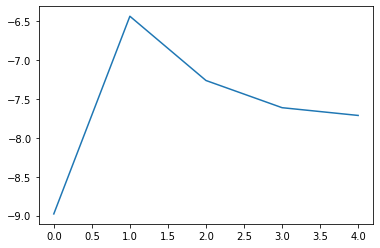

In [23]:
              ########## 5.soru ##############
df20.index = pd.to_datetime(df20['date'],format='%Y-%m-%d')
result=df20.groupby(df20.index.month)
sample50 = result.sample(n=50, replace=True)
sample50.index = pd.to_datetime(sample50['date'],format='%Y-%m-%d')
result1=sample50.groupby(sample50.index.month).mean()

df20.index = pd.to_datetime(df20['date'],format='%Y-%m-%d')
result=df20.groupby(df20.index.month)
sample100 = result.sample(n=100, replace=True)
sample100.index = pd.to_datetime(sample100['date'],format='%Y-%m-%d')
result2=sample100.groupby(sample100.index.month).mean()

df20.index = pd.to_datetime(df20['date'],format='%Y-%m-%d')
result=df20.groupby(df20.index.month)
sample250 = result.sample(n=250, replace=True)
sample250.index = pd.to_datetime(sample250['date'],format='%Y-%m-%d')
result3=sample250.groupby(sample250.index.month).mean()

df20.index = pd.to_datetime(df20['date'],format='%Y-%m-%d')
result=df20.groupby(df20.index.month)
sample500 = result.sample(n=500, replace=True)
sample500.index = pd.to_datetime(sample500['date'],format='%Y-%m-%d')
result4=sample500.groupby(sample500.index.month).mean()

df20.index = pd.to_datetime(df20['date'],format='%Y-%m-%d')
result=df20.groupby(df20.index.month)
sample1000 = result.sample(n=1000, replace=True)
sample1000.index = pd.to_datetime(sample1000['date'],format='%Y-%m-%d')
result5=sample1000.groupby(sample1000.index.month).mean()

data=[result1.mean().mean() ,result2.mean().mean(),result3.mean().mean(),result4.mean().mean(),result5.mean().mean()]

print(data)

from matplotlib import pyplot as plt
plt.plot(data)
plt.show()


### Teslim
Her sorunun altında **hem kodu ve hemde çıktısını** içeren Jupiter notebook dökümanını **pdfe** çevirerek classroom üzerinden teslim ediniz(colab de direk print ile pdf alabilirsiniz).
Çıktının güzel görünmesi için latex çıktı alarak oradan düzenleyebilirsiniz. Yada html aldıktan sonra print yapabilirsiniz.

### Değerlendirme
**Her soru 20 puandır.**